# Battle of Neighborhood - Week 1

## Best place to open a Restaurant with Indian cuisine (restricted menu)...

Recently a friend of mine approached me for my advice on opening a restricted menu restaurant in Delhi (India) considering financialy turbulent times in covid era. And here comes the Capstone project where I am supposed to do ceratin analysis on neighborhood's. So am making certain assumptions to make it fit for this project.

### Assumptions
* My friend wants to go global.
* Choice is between Newyork and Toronto.
* Still idea of restaurant is with restricted menu (we are on same frequency on this part).

### Facts
* By ethinicity ,asian population is 13.9% (South Asia contributes 3.8%), Whites constitutes 42.7%, while hispanics contribution is 29% towards total population of New York.
* In Toronto 17% population belongs to South Asian roots.
* Both cities are very diverse and financial capital of their respective country.

### Considerations
* South Asian population
* Market
* Nearby places contibuting potential clients
* other reataurant's in area and possible competition as well as potential clients.

### Approach
* Data driven.
* leveraging python capabilities with folium, foursquare and matplotlib for visualization and sklearn for analysis.

#### Data
* Demographic data of New York and Toronto.
* Neighborhood data for both location.
* Venue data for both location.
* Venues specific to Indian cuisine...

In [1]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import requests # library to handle requests
# Matplotlib and associated plotting modules
import matplotlib
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
# import k-means from clustering stage
import sklearn
from sklearn.cluster import KMeans
import folium # map rendering library

print(f"Matplotlib version: {matplotlib.__version__}")
print(f"Numpy version: {np.__version__}")
print(f"Pandas version: {pd.__version__}")
print(f"Requests version: {requests.__version__}")
print(f"sklearn version: {sklearn.__version__}")
print(f"folium version: {folium.__version__}")

Matplotlib version: 3.4.2
Numpy version: 1.21.0
Pandas version: 1.2.5
Requests version: 2.15.1
sklearn version: 0.24.2
folium version: 0.12.1


## Demographic Data

### Toronto

Neighborhood profile data for city of [Toronto](https://open.toronto.ca/dataset/neighbourhood-profiles/)

In [2]:
np_data = "./data/neighbourhood-profiles-2016.csv"
np_toronto = pd.read_csv(np_data)
np_toronto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2383 entries, 0 to 2382
Columns: 146 entries, _id to Yorkdale-Glen Park
dtypes: int64(1), object(145)
memory usage: 2.7+ MB


In [3]:
np_toronto.head()

,_id,Category,Topic,Data Source,Characteristic,City of Toronto,Agincourt North,Agincourt South-Malvern West,Alderwood,Annex,...,Willowdale West,Willowridge-Martingrove-Richview,Woburn,Woodbine Corridor,Woodbine-Lumsden,Wychwood,Yonge-Eglinton,Yonge-St.Clair,York University Heights,Yorkdale-Glen Park
0,1,Neighbourhood Information,Neighbourhood Information,City of Toronto,Neighbourhood Number,NaN,129,128,20,95,...,37,7,137,64,60,94,100,97,27,31
1,2,Neighbourhood Information,Neighbourhood Information,City of Toronto,TSNS2020 Designation,NaN,No Designation,No Designation,No Designation,No Designation,...,No Designation,No Designation,NIA,No Designation,No Designation,No Designation,No Designation,No Designation,NIA,Emerging Neighbourhood
2,3,Population,Population and dwellings,Census Profile 98-316-X2016001,"Population, 2016","2,731,571","29,113","23,757","12,054","30,526",...,"16,936","22,156","53,485","12,541","7,865","14,349","11,817","12,528","27,593","14,804"
3,4,Population,Population and dwellings,Census Profile 98-316-X2016001,"Population, 2011","2,615,060","30,279","21,988","11,904","29,177",...,"15,004","21,343","53,350","11,703","7,826","13,986","10,578","11,652","27,713","14,687"
4,5,Population,Population and dwellings,Census Profile 98-316-X2016001,Population Change 2011-2016,4.50%,-3.90%,8.00%,1.30%,4.60%,...,12.90%,3.80%,0.30%,7.20%,0.50%,2.60%,11.70%,7.50%,-0.40%,0.80%


In [4]:
np_toronto['Characteristic'] = np_toronto.Characteristic.str.strip()
characteristics = ['Population, 2016', 'Indo-Aryan languages', 'Punjabi (Panjabi)']

cond1 = np_toronto['Characteristic'].isin(characteristics)
cond2 = np_toronto['Topic'].isin(["Mother tongue", "Population and dwellings"])  
toronto_character = np_toronto[cond1 & cond2]
toronto_ind_diaspora = toronto_character.T.iloc[4:, :]
toronto_ind_diaspora


,2,303,312
Characteristic,"Population, 2016",Indo-Aryan languages,Punjabi (Panjabi)
City of Toronto,"2,731,571","138,625","19,965"
Agincourt North,"29,113",910,105
Agincourt South-Malvern West,"23,757","1,500",165
Alderwood,"12,054",205,15
...,...,...,...
Wychwood,"14,349",80,25
Yonge-Eglinton,"11,817",115,10
Yonge-St.Clair,"12,528",130,20
York University Heights,"27,593","1,710",265


In [5]:
cols = [ 'pop2016', 'indo_aryan', 'punjabi']
toronto_ind_diaspora.columns = cols
toronto_ind_diaspora = toronto_ind_diaspora.iloc[1:, :]
toronto_ind_diaspora['indo_aryan'] = toronto_ind_diaspora['indo_aryan'].str.replace(',', '')
toronto_ind_diaspora['pop2016'] = toronto_ind_diaspora['pop2016'].str.replace(',', '')
toronto_ind_diaspora['punjabi'] = toronto_ind_diaspora['punjabi'].str.replace(',', '')
toronto_ind_diaspora['indo_aryan'] = toronto_ind_diaspora['indo_aryan'].astype('float64')
toronto_ind_diaspora['pop2016'] = toronto_ind_diaspora['pop2016'].astype('float64')
toronto_ind_diaspora['punjabi'] = toronto_ind_diaspora['punjabi'].astype('float64')
toronto_ind_diaspora.head()

<ipython-input-5-89934742ff97>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toronto_ind_diaspora['indo_aryan'] = toronto_ind_diaspora['indo_aryan'].str.replace(',', '')
<ipython-input-5-89934742ff97>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toronto_ind_diaspora['pop2016'] = toronto_ind_diaspora['pop2016'].str.replace(',', '')
<ipython-input-5-89934742ff97>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

,pop2016,indo_aryan,punjabi
City of Toronto,2731571.0,138625.0,19965.0
Agincourt North,29113.0,910.0,105.0
Agincourt South-Malvern West,23757.0,1500.0,165.0
Alderwood,12054.0,205.0,15.0
Annex,30526.0,400.0,50.0


In [6]:
toronto_ind_diaspora['%pop'] = (
    (toronto_ind_diaspora['indo_aryan'] + toronto_ind_diaspora['punjabi']) / toronto_ind_diaspora['pop2016']) * 100
toronto_ind_diaspora.head()

<ipython-input-6-70ed2e90789e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toronto_ind_diaspora['%pop'] = (


,pop2016,indo_aryan,punjabi,%pop
City of Toronto,2731571.0,138625.0,19965.0,5.805817
Agincourt North,29113.0,910.0,105.0,3.486415
Agincourt South-Malvern West,23757.0,1500.0,165.0,7.008461
Alderwood,12054.0,205.0,15.0,1.825120
Annex,30526.0,400.0,50.0,1.474153


In [7]:
# plot top 10 neighborhood with indian diaspora
ind_in_toronto = toronto_ind_diaspora.sort_values('%pop', ascending=False)
ind_in_toronto

,pop2016,indo_aryan,punjabi,%pop
West Humber-Clairville,33312.0,8710.0,4925.0,40.931196
Thorncliffe Park,21108.0,7140.0,435.0,35.886868
Humber Summit,12416.0,2615.0,975.0,28.914304
Mount Olive-Silverstone-Jamestown,32954.0,6870.0,2635.0,28.843236
Taylor-Massey,15683.0,4065.0,100.0,26.557419
...,...,...,...,...
Briar Hill-Belgravia,14257.0,70.0,15.0,0.596198
The Beaches,21567.0,90.0,20.0,0.510038
Bedford Park-Nortown,23236.0,100.0,10.0,0.473403
Runnymede-Bloor West Village,10070.0,40.0,5.0,0.446872


In [9]:
ind_in_toronto.to_csv("./data/toronto_neighborhoods.csv", index=True)

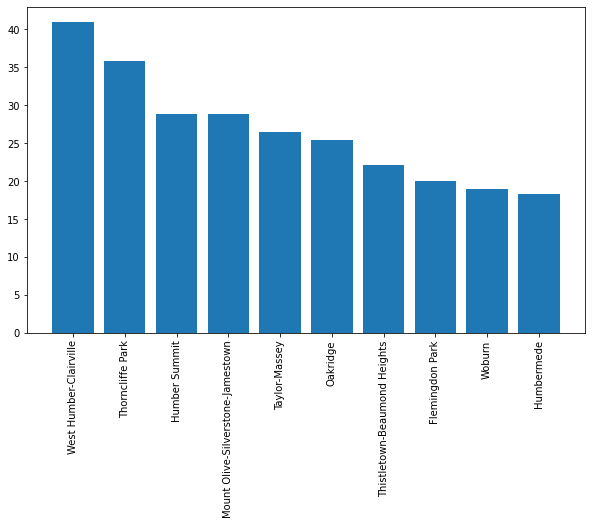

In [8]:
# visualize
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(ind_in_toronto.index[:10], ind_in_toronto['%pop'][:10])
ax.tick_params(axis='x', labelrotation = 90)
plt.show()

In [82]:
# There are 140 neighborhoods in Toronto, ON, Canada
neighborhoods = ind_in_toronto.index.tolist()
neighborhoods

['West Humber-Clairville',
 'Thorncliffe Park',
 'Humber Summit',
 'Mount Olive-Silverstone-Jamestown',
 'Taylor-Massey',
 'Oakridge',
 'Thistletown-Beaumond Heights',
 'Flemingdon Park',
 'Woburn',
 'Humbermede',
 'Malvern',
 'Regent Park',
 'Clairlea-Birchmount',
 'Scarborough Village',
 'Bendale',
 'Kennedy Park',
 'Kingsview Village-The Westway',
 'Highland Creek',
 'North St. James Town',
 'Rouge',
 'Dorset Park',
 'Henry Farm',
 'Cliffcrest',
 'Morningside',
 'Victoria Village',
 'Ionview',
 'Rexdale-Kipling',
 'West Hill',
 'York University Heights',
 'Eglinton East',
 'Agincourt South-Malvern West',
 'Willowridge-Martingrove-Richview',
 'Maple Leaf',
 'Centennial Scarborough',
 "Tam O'Shanter-Sullivan",
 'East End-Danforth',
 'Greenwood-Coxwell',
 "O'Connor-Parkview",
 'Blake-Jones',
 'Parkwoods-Donalda',
 'Wexford/Maryvale',
 'Don Valley Village',
 'Elms-Old Rexdale',
 "L'Amoreaux",
 'Etobicoke West Mall',
 'Waterfront Communities-The Island',
 'Bay Street Corridor',
 'Danfort

In [83]:
import geocoder

In [87]:
coordinates_dict = dict()

for n in neighborhoods:
    coordinates = None
    # loop until you get the coordinates
    count = 0
    while(coordinates is None):
        count += 1
        g = geocoder.google(f'{n}, Toronto, Ontario')
        coordinates = g.latlng
        coordinates_dict[n] = coordinates
        print(count)
        if count == 10:
            # dont try further,
            coordinates = "Not found"
            print(f"not able to find coordinates for {n}")
        else:
            print(f"got coordinates for {n}")

1
got coordinates for West Humber-Clairville
2
got coordinates for West Humber-Clairville
3
got coordinates for West Humber-Clairville
4
got coordinates for West Humber-Clairville
5
got coordinates for West Humber-Clairville
6
got coordinates for West Humber-Clairville
7
got coordinates for West Humber-Clairville
8
got coordinates for West Humber-Clairville
9
got coordinates for West Humber-Clairville
10
not able to find coordinates for West Humber-Clairville
1
got coordinates for Thorncliffe Park
2
got coordinates for Thorncliffe Park
3
got coordinates for Thorncliffe Park
4
got coordinates for Thorncliffe Park
5
got coordinates for Thorncliffe Park
6
got coordinates for Thorncliffe Park
7
got coordinates for Thorncliffe Park
8
got coordinates for Thorncliffe Park
9
got coordinates for Thorncliffe Park
10
not able to find coordinates for Thorncliffe Park
1
got coordinates for Humber Summit
2
got coordinates for Humber Summit
3
got coordinates for Humber Summit
4
got coordinates for Hu

KeyboardInterrupt: 

In [89]:
from geopy.geocoders import Nominatim

In [97]:
# g = geocoder.google("Clairville, Toronto")

geolocator = Nominatim(user_agent="toranto_explorer")

address = 'Ontario, Canada'
location = geolocator.geocode(address)

In [98]:
location.lattitude

AttributeError: 'Location' object has no attribute 'lattitude'